In [78]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [81]:
categorical = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df[categorical] = df[categorical].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


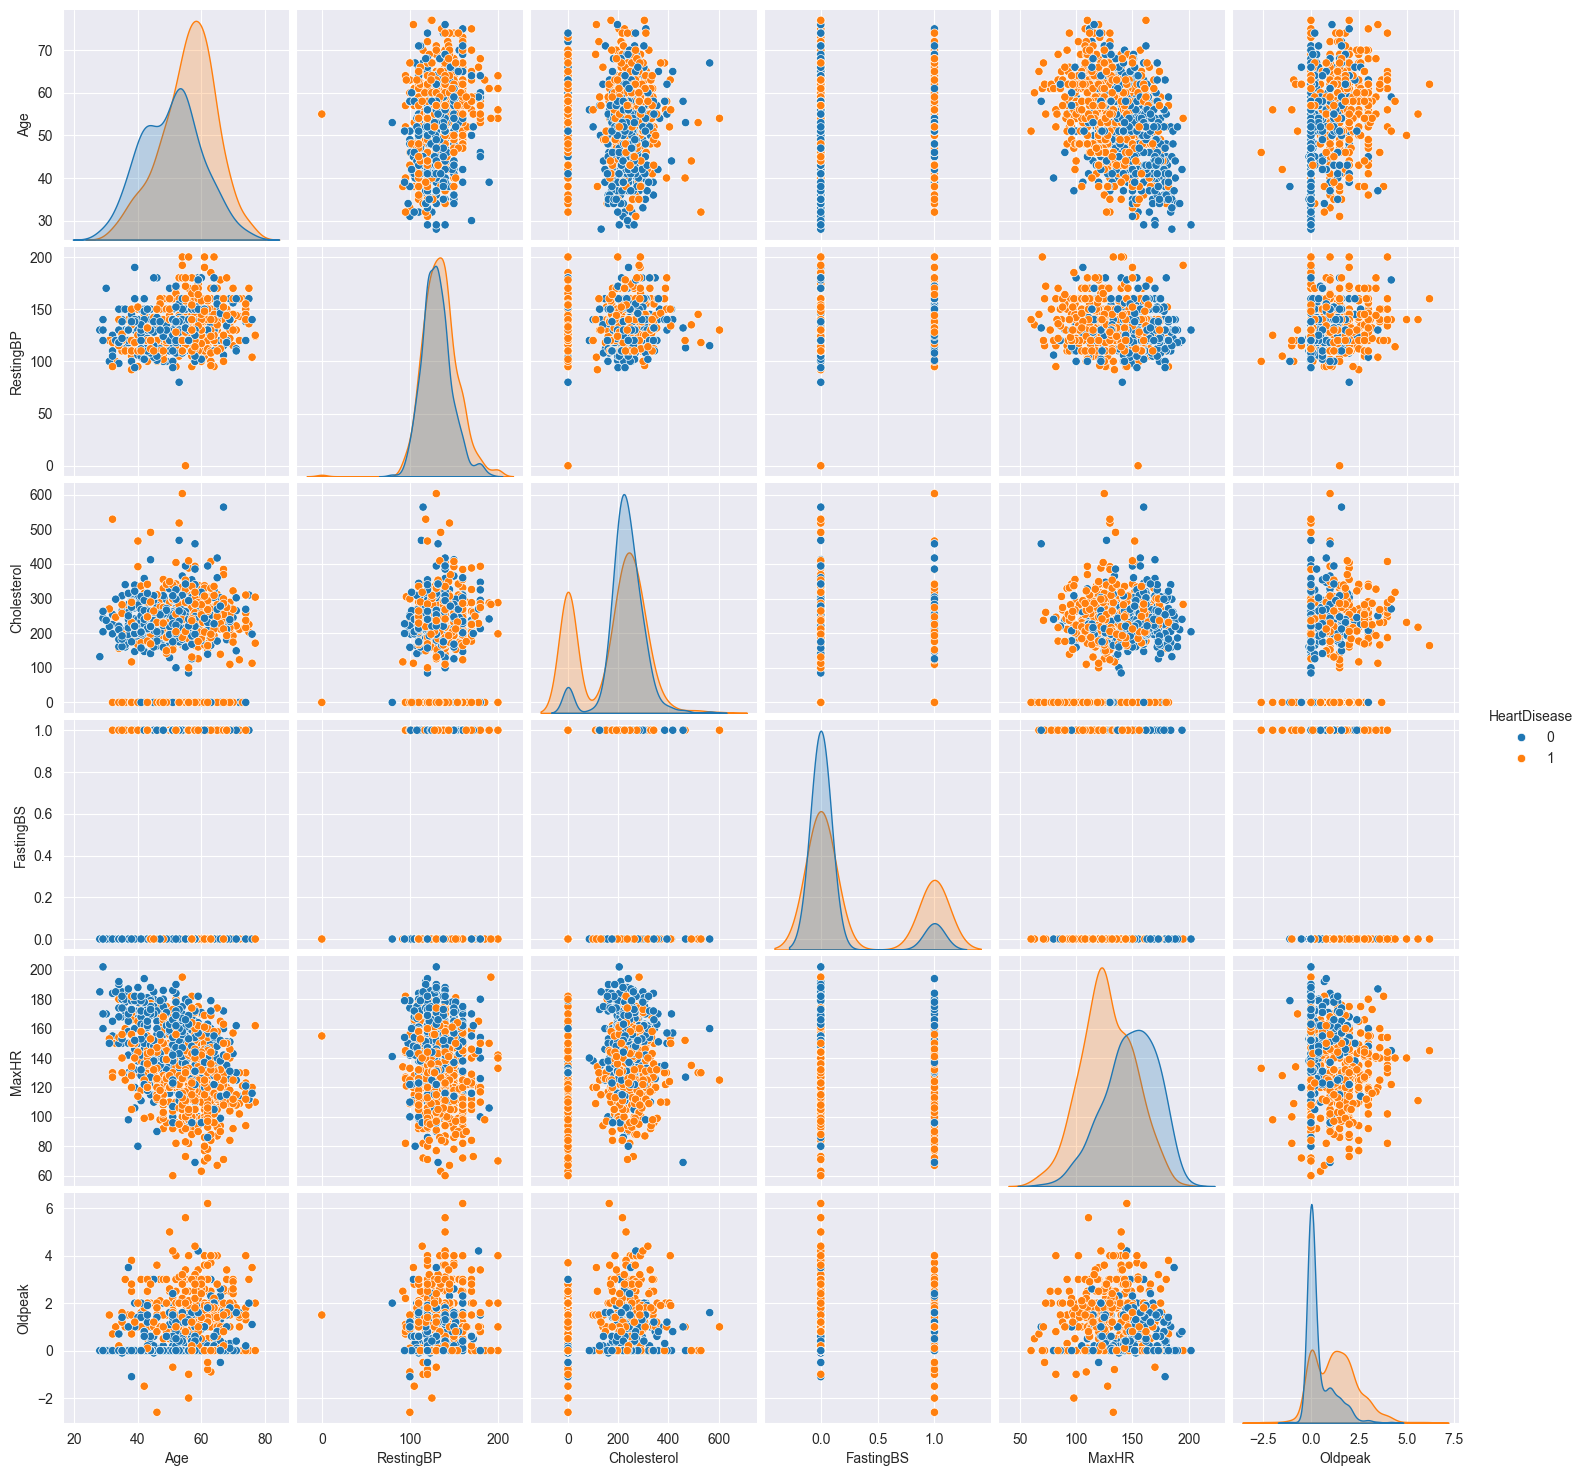

In [82]:
sns.pairplot(df, hue="HeartDisease")

# Numerical to Numerical

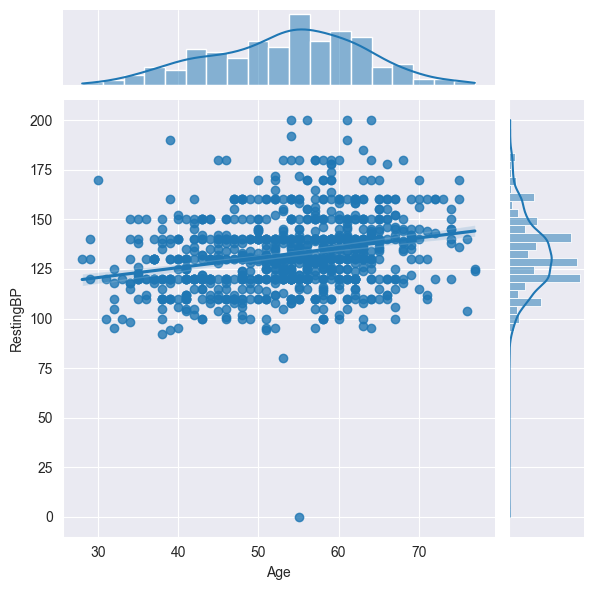

In [22]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="reg")

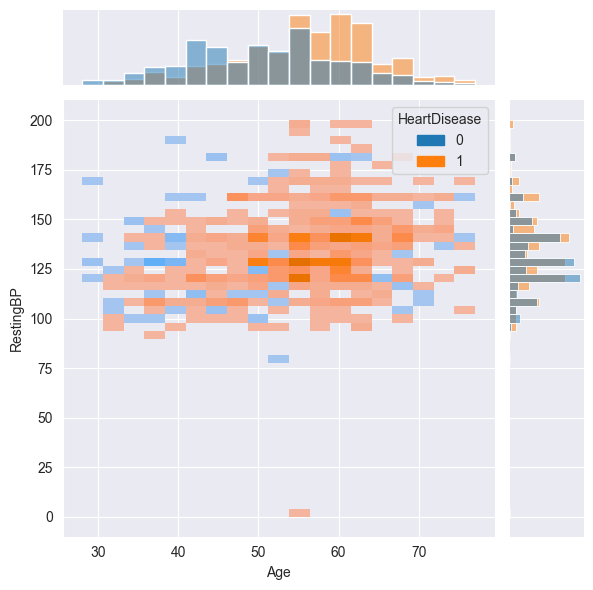

In [23]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="hist", hue="HeartDisease")

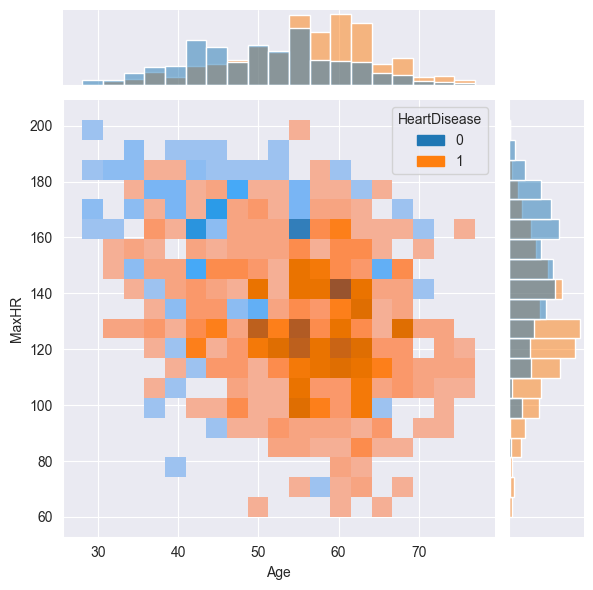

In [24]:
sns.jointplot(data=df, x="Age", y="MaxHR", kind="hist", hue="HeartDisease")

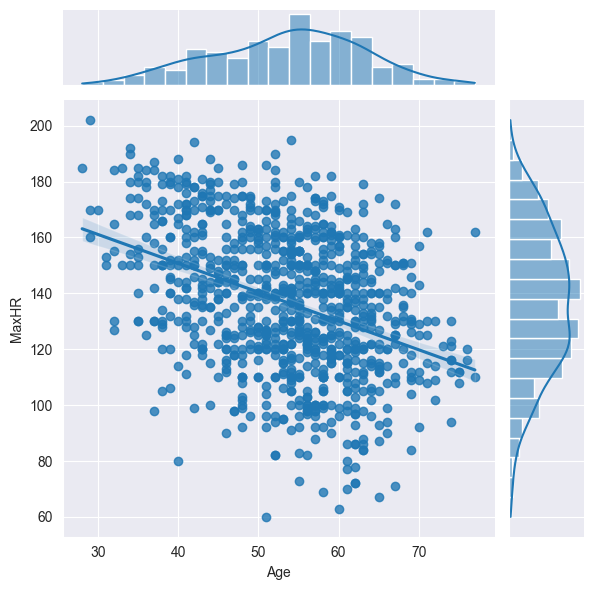

In [25]:
sns.jointplot(data=df, x="Age", y="MaxHR", kind="reg")

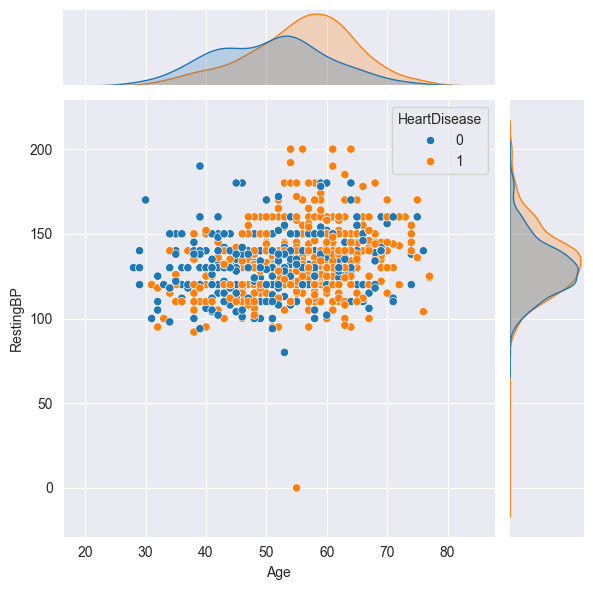

In [26]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="scatter", hue="HeartDisease")

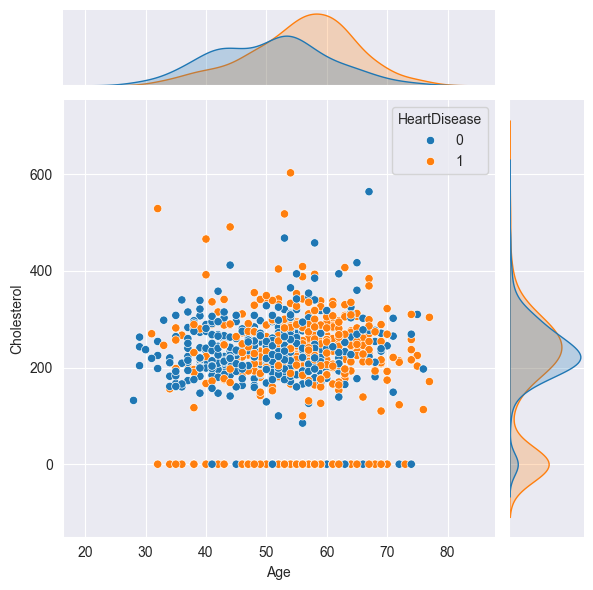

In [27]:
sns.jointplot(data=df, x="Age", y="Cholesterol", kind="scatter", hue="HeartDisease")

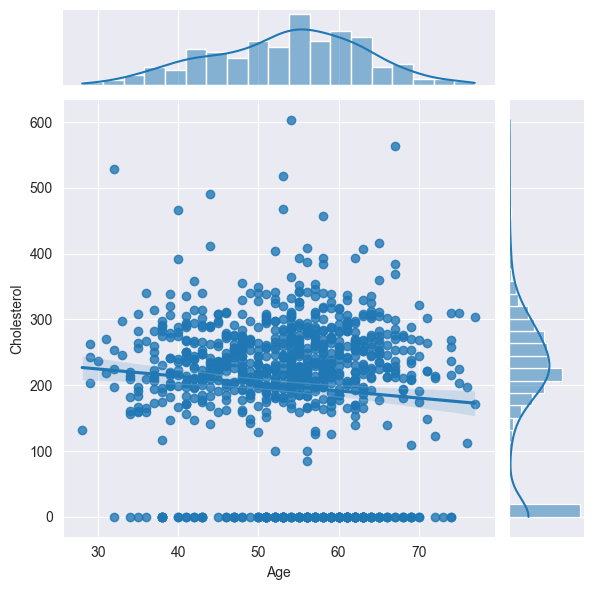

In [28]:
sns.jointplot(data=df, x="Age", y="Cholesterol", kind="reg")

<Axes: xlabel='Cholesterol', ylabel='Count'>

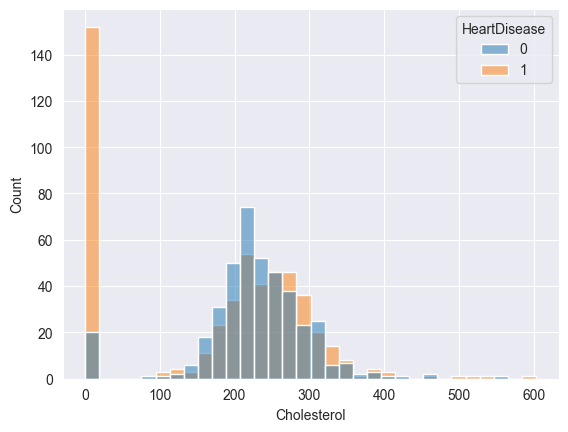

In [29]:
sns.histplot(df, x="Cholesterol",  hue="HeartDisease")

In [30]:
corr = df.drop(columns=categorical).corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

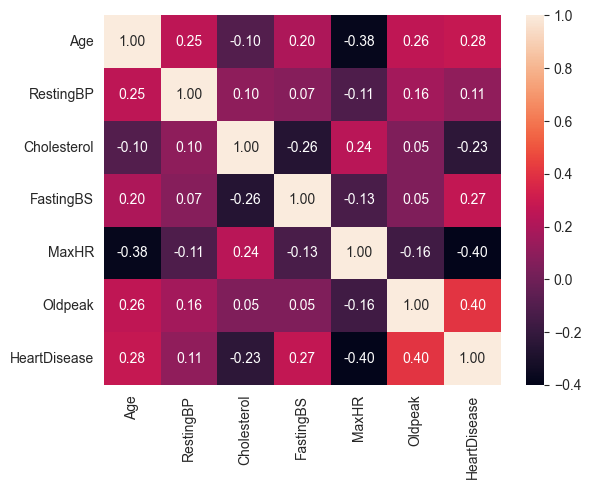

In [31]:
sns.heatmap(corr, annot=True, fmt=".2f")

# Numerical to Categorical

<Axes: xlabel='Sex', ylabel='Age'>

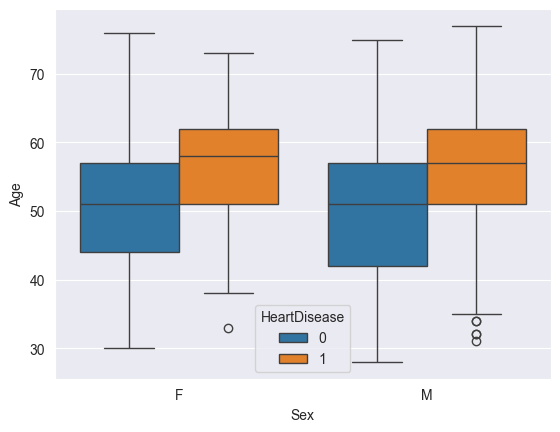

In [32]:
sns.boxplot(df, y="Age", x="Sex", hue="HeartDisease")

<Axes: xlabel='Age', ylabel='Count'>

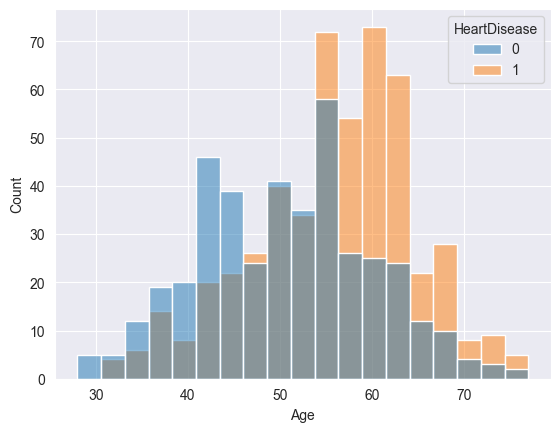

In [33]:
sns.histplot(df, x="Age", hue="HeartDisease")

<Axes: xlabel='ChestPainType', ylabel='count'>

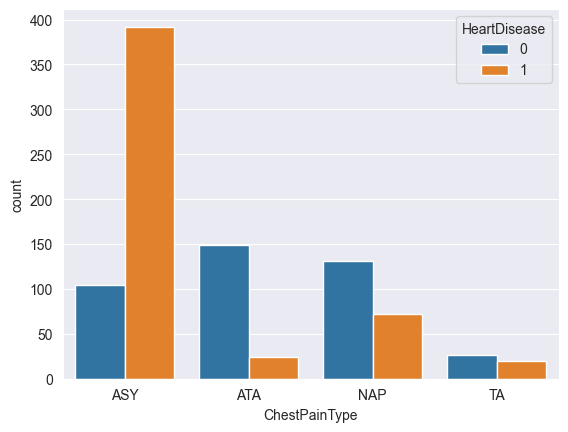

In [34]:
sns.countplot(df, x="ChestPainType", hue="HeartDisease")

<Axes: ylabel='Age'>

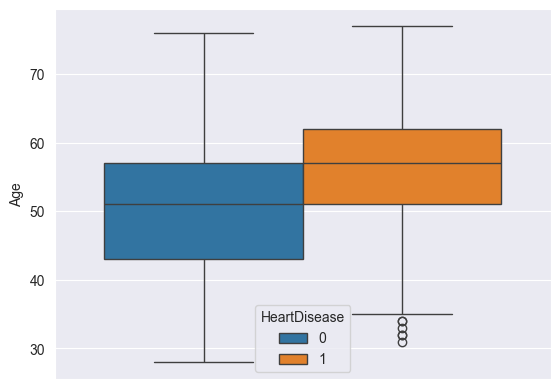

In [35]:
sns.boxplot(df, y="Age", hue="HeartDisease")

<Axes: ylabel='RestingBP'>

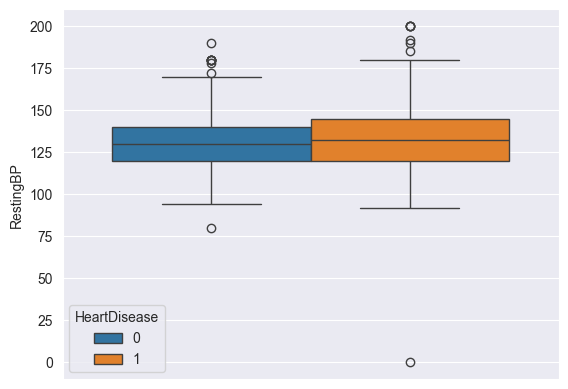

In [36]:
sns.boxplot(df, y="RestingBP", hue="HeartDisease")

<Axes: ylabel='Age'>

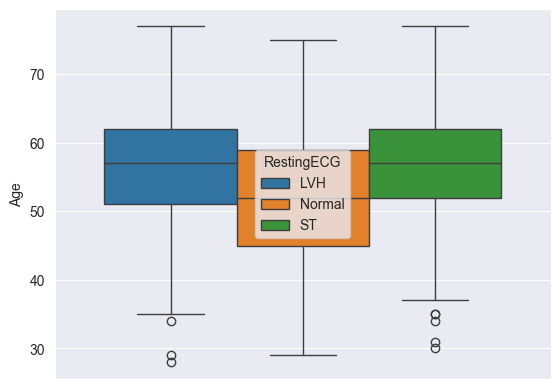

In [37]:
sns.boxplot(df, y="Age", hue="RestingECG")

# Categorical to Categorical

<Axes: xlabel='HeartDisease', ylabel='ChestPainType'>

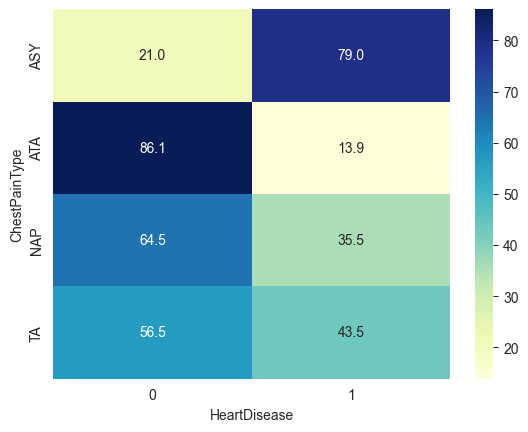

In [41]:
cross_tab = pd.crosstab(df["ChestPainType"], df["HeartDisease"], normalize="index") * 100
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")


<Axes: xlabel='HeartDisease', ylabel='ChestPainType'>

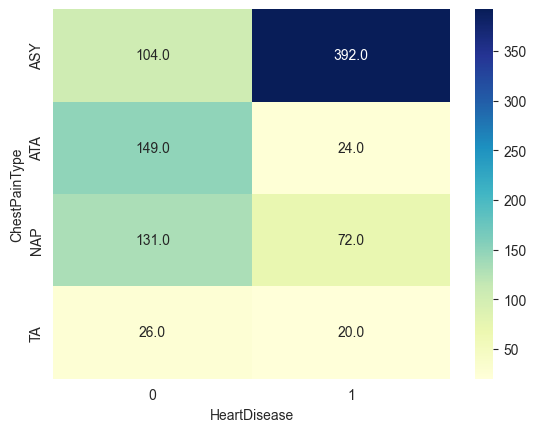

In [42]:
cross_tab = pd.crosstab(df["ChestPainType"], df["HeartDisease"]) 
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")


<Axes: xlabel='ST_Slope', ylabel='ChestPainType'>

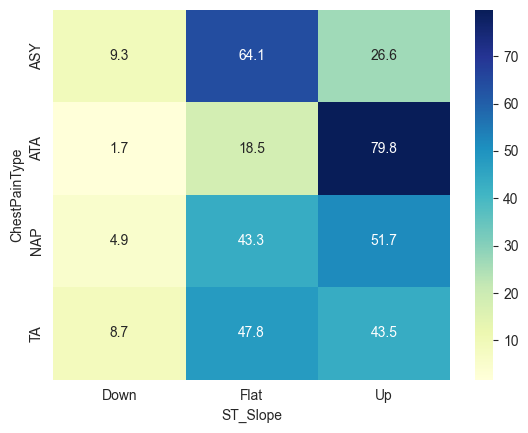

In [39]:
cross_tab = pd.crosstab(df["ChestPainType"], df["ST_Slope"], normalize="index") * 100
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")


In [40]:
# ExtraTreesClassifier, XGBoost, lightgbm

In [83]:
from sklearn.model_selection import train_test_split
target = "HeartDisease"
x = df.drop(columns = [target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier
model = LGBMClassifier(class_weight="balanced")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))        

[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [55]:
import xgboost as xgb
model = xgb.XGBClassifier(enable_categorical=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))        

[[72 10]
 [11 91]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [86]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_onehot = df
def encode(column_name, df):
    encoded_array = encoder.fit_transform(df[[column_name]])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column_name]))
    df_final = pd.concat([df, encoded_df], axis=1)
    df_final = df_final.drop(columns=[column_name])
    return df_final
for col in categorical:
    df_onehot = encode(col, df_onehot)

In [87]:
df_onehot.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [88]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [89]:
from sklearn.ensemble import ExtraTreesClassifier
x = df_onehot.drop(columns = [target])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))        

[[67 15]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



In [84]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [90]:
from sklearn.preprocessing import LabelEncoder
df_label_encoder = df
label_encoder = LabelEncoder()
for col in categorical:
    df_label_encoder[col] = label_encoder.fit_transform(df[col])

In [91]:
df_label_encoder.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [92]:
x = df_label_encoder.drop(columns = [target])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))        

[[72 10]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

